In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set visualization style
sns.set_theme(style="whitegrid", palette="colorblind")

In [2]:
data = pd.read_csv("../../datasets/linkedin/Connections.csv")

## Exploring Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     834 non-null    object
 1   Last Name      834 non-null    object
 2   URL            834 non-null    object
 3   Email Address  33 non-null     object
 4   Company        809 non-null    object
 5   Position       810 non-null    object
 6   Connected On   875 non-null    object
dtypes: object(7)
memory usage: 48.0+ KB


## Viewing the First Rows

In [4]:
# Print the first 5 rows of the DataFrame 'data'
print(data.head())

            First Name                     Last Name  \
0              Ayodele  Samuel Adebayo (UncleBigBay)   
1               Sander                     Schulhoff   
2                 Brad                    Davis, PhD   
3                Jacob               Diamond-Reivich   
4  Syed Raza Ur Rehman                          Shah   

                                                 URL Email Address  \
0            https://www.linkedin.com/in/unclebigbay           NaN   
1       https://www.linkedin.com/in/sander-schulhoff           NaN   
2            https://www.linkedin.com/in/bhdavis1978           NaN   
3  https://www.linkedin.com/in/jacob-diamond-reiv...           NaN   
4            https://www.linkedin.com/in/razashah053           NaN   

              Company              Position Connected On  
0            Hashnode     Software Engineer  07 Apr 2025  
1     Learn Prompting      Co-Founder & CEO  02 Apr 2025  
2  Motorola Solutions  Data Science Manager  01 Apr 2025  
3     

## Checking columns with missing values

In [5]:
print(data.isnull().sum())

First Name        41
Last Name         41
URL               41
Email Address    842
Company           66
Position          65
Connected On       0
dtype: int64


## Number of Unique Companies

In [6]:
unique_companies = data['Company'].nunique()
print("Number of unique companies:", unique_companies)

Number of unique companies: 716


## Rows with missing first name, last name, or URL

In [7]:
# Find rows with missing First Name, Last Name, or URL
missing_values_df = data[data[['First Name', 'Last Name', 'URL']].isnull().any(axis=1)]

# Display the relevant columns to investigate who is missing what
print(missing_values_df[['First Name', 'Last Name', 'URL']])

    First Name Last Name  URL
22         NaN       NaN  NaN
35         NaN       NaN  NaN
132        NaN       NaN  NaN
147        NaN       NaN  NaN
152        NaN       NaN  NaN
155        NaN       NaN  NaN
158        NaN       NaN  NaN
181        NaN       NaN  NaN
208        NaN       NaN  NaN
219        NaN       NaN  NaN
335        NaN       NaN  NaN
340        NaN       NaN  NaN
352        NaN       NaN  NaN
358        NaN       NaN  NaN
359        NaN       NaN  NaN
367        NaN       NaN  NaN
383        NaN       NaN  NaN
385        NaN       NaN  NaN
386        NaN       NaN  NaN
402        NaN       NaN  NaN
457        NaN       NaN  NaN
478        NaN       NaN  NaN
542        NaN       NaN  NaN
568        NaN       NaN  NaN
571        NaN       NaN  NaN
593        NaN       NaN  NaN
605        NaN       NaN  NaN
607        NaN       NaN  NaN
646        NaN       NaN  NaN
654        NaN       NaN  NaN
660        NaN       NaN  NaN
671        NaN       NaN  NaN
682       

In [8]:
missing_first_name = data[data['First Name'].isnull()]
print(missing_first_name)

    First Name Last Name  URL Email Address Company Position Connected On
22         NaN       NaN  NaN           NaN     NaN      NaN  01 Oct 2024
35         NaN       NaN  NaN           NaN     NaN      NaN  29 Feb 2024
132        NaN       NaN  NaN           NaN     NaN      NaN  14 Oct 2023
147        NaN       NaN  NaN           NaN     NaN      NaN  10 Oct 2023
152        NaN       NaN  NaN           NaN     NaN      NaN  05 Oct 2023
155        NaN       NaN  NaN           NaN     NaN      NaN  01 Oct 2023
158        NaN       NaN  NaN           NaN     NaN      NaN  29 Sep 2023
181        NaN       NaN  NaN           NaN     NaN      NaN  21 Sep 2023
208        NaN       NaN  NaN           NaN     NaN      NaN  07 Aug 2023
219        NaN       NaN  NaN           NaN     NaN      NaN  10 Jul 2023
335        NaN       NaN  NaN           NaN     NaN      NaN  21 May 2023
340        NaN       NaN  NaN           NaN     NaN      NaN  19 May 2023
352        NaN       NaN  NaN         

## Drop NaN rows

In [9]:
# Drop rows where all columns EXCEPT 'Connected On' are NaN
data = data[~(data.drop(columns=['Connected On']).isnull().all(axis=1))]
data.reset_index(drop=True, inplace=True)

## Drop Email Address column

In [10]:
# Drop the 'Email Address' column
data = data.drop(columns=['Email Address'])

## Recheck columns with missing value

In [11]:
print(data.isnull().sum())

First Name       0
Last Name        0
URL              0
Company         25
Position        24
Connected On     0
dtype: int64


## Data Transformation

In [12]:
# Convert 'Connected On' column to datetime
data['Connected On'] = pd.to_datetime(data['Connected On'], errors='coerce')

## Descriptive Statistics

In [13]:
# Connection timeline stats
print("\n📅 Connection Dates Summary:\n")
print(data['Connected On'].describe())

# Most active days
print("\n🔥 Top Connection Days:\n")
print(data['Connected On'].dt.date.value_counts().head())


📅 Connection Dates Summary:

count                     834
unique                    298
top       2023-10-18 00:00:00
freq                       23
first     2021-07-30 00:00:00
last      2025-04-07 00:00:00
Name: Connected On, dtype: object

🔥 Top Connection Days:

2023-10-18    23
2023-03-02    19
2023-01-21    15
2023-03-03    15
2023-02-21    14
Name: Connected On, dtype: int64


/tmp/ipykernel_10180/484342517.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data['Connected On'].describe())


#### 📅 **Connection Dates Summary:**

```plaintext
count                     834
unique                    298
top       2023-10-18 00:00:00
freq                       23
first     2021-07-30 00:00:00
last      2025-04-07 00:00:00
```

#### ✅ Explanation:

- **`count` (834):**  
  The total number of non-null entries in the `Connected On` column. That means I have 834 connections with known connection dates.

- **`unique` (298):**  
  There are 298 distinct dates on which those connections occurred.

- **`top` (`2023-10-18`):**  
  The most common connection date — the day I made the **highest number of connections**.

- **`freq` (23):**  
  On that top date (`2023-10-18`), I made **23 connections** — more than any other single day.

- **`first` (`2021-07-30`):**  
  The **earliest connection** in the dataset — this marks the start of my LinkedIn connection timeline.

- **`last` (`2025-04-07`):**  
  The **most recent connection** recorded.

---

#### 🔥 **Top Connection Days:**

```plaintext
2023-10-18    23
2023-03-02    19
2023-03-03    15
2023-01-21    15
2023-02-28    14
```

#### ✅ Explanation:

This shows the **top 5 days** with the most connections:

- **2023-10-18:** 23 connections  
- **2023-03-02:** 19 connections  
- **2023-03-03:** 15 connections  
- **2023-01-21:** 15 connections  
- **2023-02-28:** 14 connections  

These are my most **network-active days**.

## Top companies by number of connections

                     Company  Number of Connections
0                  Freelance                     12
1                  Microsoft                      7
2              Self-employed                      5
3  Amazon Web Services (AWS)                      5
4                MTN Nigeria                      5
5                     Upwork                      5
6                alx_africa                       5
7                        CGI                      4
8                        CDW                      4
9                    Infosys                      4


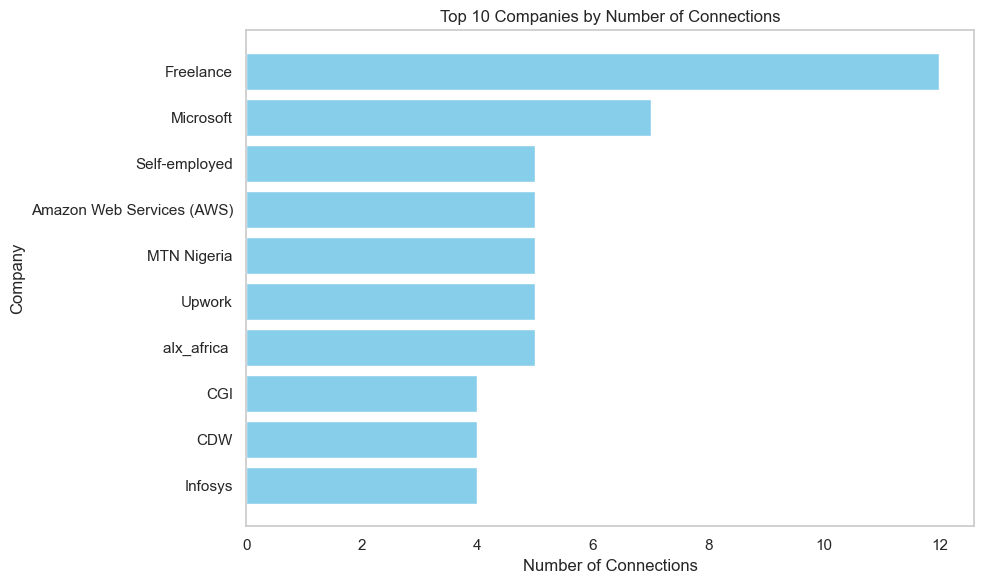

In [14]:
top_companies_df = data['Company'].value_counts().reset_index()
top_companies_df.columns = ['Company', 'Number of Connections']

# Display the top 10
print(top_companies_df.head(10))

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_companies_df['Company'][:10][::-1], top_companies_df['Number of Connections'][:10][::-1], color='skyblue')
plt.xlabel('Number of Connections')
plt.ylabel('Company')
plt.title('Top 10 Companies by Number of Connections')
plt.grid(False)
plt.tight_layout()
#plt.figtext(0.5, -0.05, "Top Companies by Number of Connections", ha="center", fontsize=12)

# Save the figure
plt.savefig("../../plots/top_10_companies_connections.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


## Most common positions/job titles (Top Roles by Connections)

                   Position  Number of Connections  Percentage
0         Software Engineer                     66        8.15
1  Senior Software Engineer                     24        2.96
2        Frontend Developer                     19        2.35
3                   Founder                     12        1.48
4        Software Developer                     11        1.36
5         Frontend Engineer                      9        1.11
6                Co-Founder                      9        1.11
7       Full Stack Engineer                      7        0.86
8        Back End Developer                      6        0.74
9  Chief Technology Officer                      6        0.74


<Figure size 1000x600 with 0 Axes>

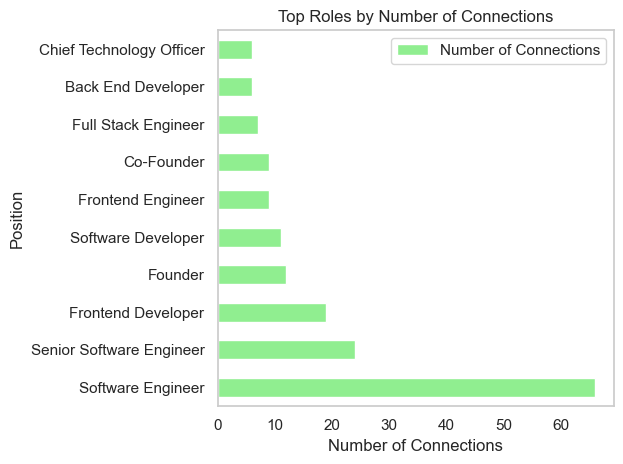

In [15]:

# Count the occurrences of each position and create a new DataFrame
top_positions_df = data['Position'].value_counts().reset_index()
top_positions_df.columns = ['Position', 'Number of Connections']

# Add a percentage column
top_positions_df['Percentage'] = (top_positions_df['Number of Connections'] / top_positions_df['Number of Connections'].sum()) * 100

# Round the percentage for cleaner display
top_positions_df['Percentage'] = top_positions_df['Percentage'].round(2)

# Print the top 10 roles by number of connections
print(top_positions_df.head(10))

# Plot the top roles by connections as a horizontal bar chart
plt.figure(figsize=(10, 6))
top_positions_df.head(10).plot(kind='barh', x='Position', y='Number of Connections', color='lightgreen')
plt.title('Top Roles by Number of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Position')
plt.grid(False)
plt.tight_layout()
plt.savefig("../../plots/top_10_roles_connections.png", dpi=300, bbox_inches="tight")
plt.show()

## Connection growth over time (based on Connected On)

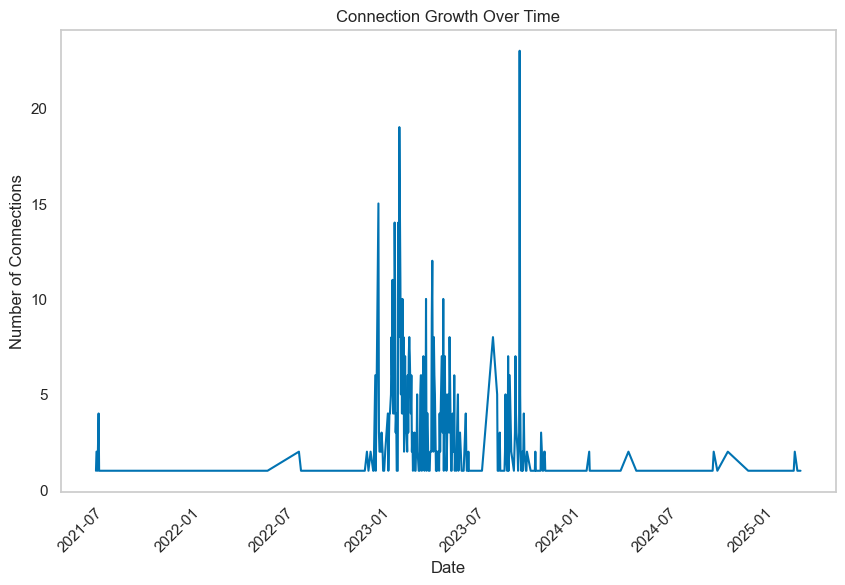

In [16]:
# Group by date and count the number of connections per day
connection_growth = data.groupby(data['Connected On'].dt.date).size()

plt.figure(figsize=(10, 6))
connection_growth.plot(kind='line')
plt.title('Connection Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45)
plt.grid(False)
plt.savefig("../../plots/connection_growth.png", dpi=300, bbox_inches="tight")
plt.show()

## Connections by Month/Year

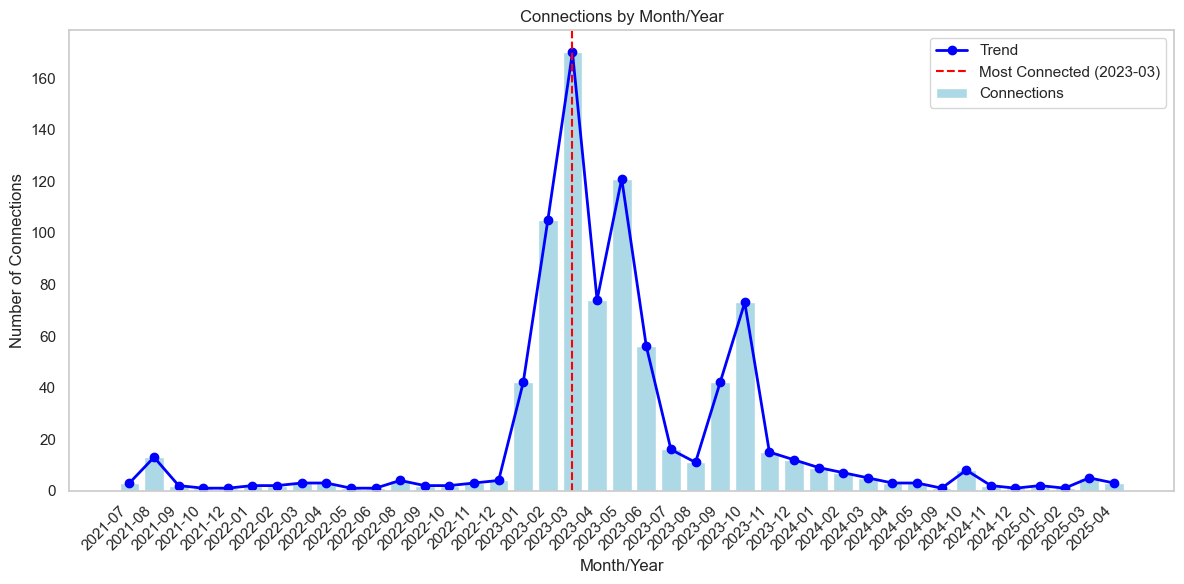

In [17]:
# Extract Year-Month and count the number of connections per month
data['Year-Month'] = data['Connected On'].dt.to_period('M')

# Group by Year-Month and count the number of connections
connections_by_month = data.groupby('Year-Month').size().reset_index(name='Number of Connections')

# Add percentage column
total_connections = connections_by_month['Number of Connections'].sum()
connections_by_month['Percentage'] = (connections_by_month['Number of Connections'] / total_connections * 100).round(2)

# Find the most connected month/year
most_connected_idx = connections_by_month['Number of Connections'].idxmax()
most_connected_month_year = str(connections_by_month.loc[most_connected_idx, 'Year-Month'])

# Convert Year-Month to string for plotting
connections_by_month['Year-Month'] = connections_by_month['Year-Month'].astype(str)

# Plot both bar and line chart
plt.figure(figsize=(12, 6))

# Bar chart
plt.bar(connections_by_month['Year-Month'], connections_by_month['Number of Connections'],
        color='lightblue', label='Connections')

# Line chart overlay
plt.plot(connections_by_month['Year-Month'], connections_by_month['Number of Connections'],
         marker='o', color='blue', linewidth=2, label='Trend')

# Highlight most connected month
plt.axvline(x=most_connected_idx, color='red', linestyle='--', label=f'Most Connected ({most_connected_month_year})')

# Labels and grid
plt.title('Connections by Month/Year')
plt.xlabel('Month/Year')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/connection_growth_month.png", dpi=300, bbox_inches="tight")
plt.show()


## Connection streaks (7 Days or more)

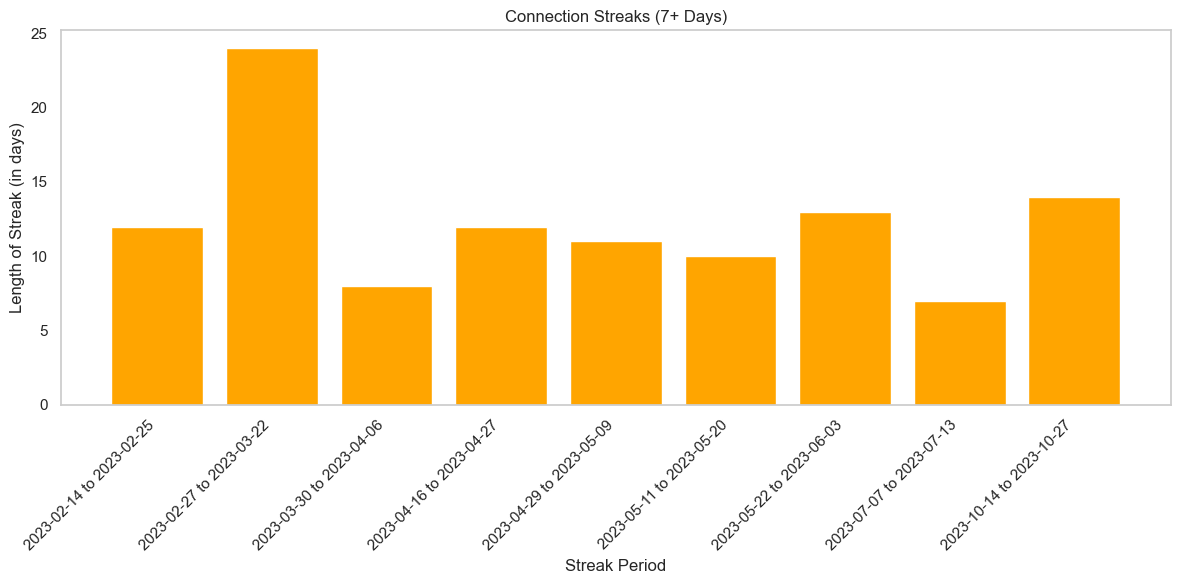

In [18]:
# Sort data by 'Connected On' in ascending order
data = data.sort_values(by='Connected On')

# Drop duplicate dates and make a copy to avoid warnings
data_unique_dates = data.drop_duplicates(subset='Connected On').copy()

# Create a new column to track the difference in days between consecutive dates
data_unique_dates.loc[:, 'Day Difference'] = data_unique_dates['Connected On'].diff().dt.days

# Identify the start of a new streak (if the difference is more than 1 day)
data_unique_dates.loc[:, 'Streak Start'] = data_unique_dates['Day Difference'] > 1

# Create a 'Streak ID' column to group the streaks together
data_unique_dates.loc[:, 'Streak ID'] = data_unique_dates['Streak Start'].cumsum()

# Count the length of each streak
streak_lengths = data_unique_dates.groupby('Streak ID').size()

# Filter for streaks that are 7 days or more
long_streaks = streak_lengths[streak_lengths >= 7]

# Get start and end dates of each long streak
streak_ranges = data_unique_dates.groupby('Streak ID')['Connected On'].agg(['min', 'max'])
streak_ranges = streak_ranges.loc[long_streaks.index]
streak_labels = streak_ranges.apply(lambda row: f"{row['min'].date()} to {row['max'].date()}", axis=1)

# Plot the connection streaks lengths with labels
plt.figure(figsize=(12, 6))
plt.bar(streak_labels, long_streaks.values, color='orange')
plt.title('Connection Streaks (7+ Days)')
plt.xlabel('Streak Period')
plt.ylabel('Length of Streak (in days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/connection_streak.png", dpi=300, bbox_inches="tight")
plt.show()

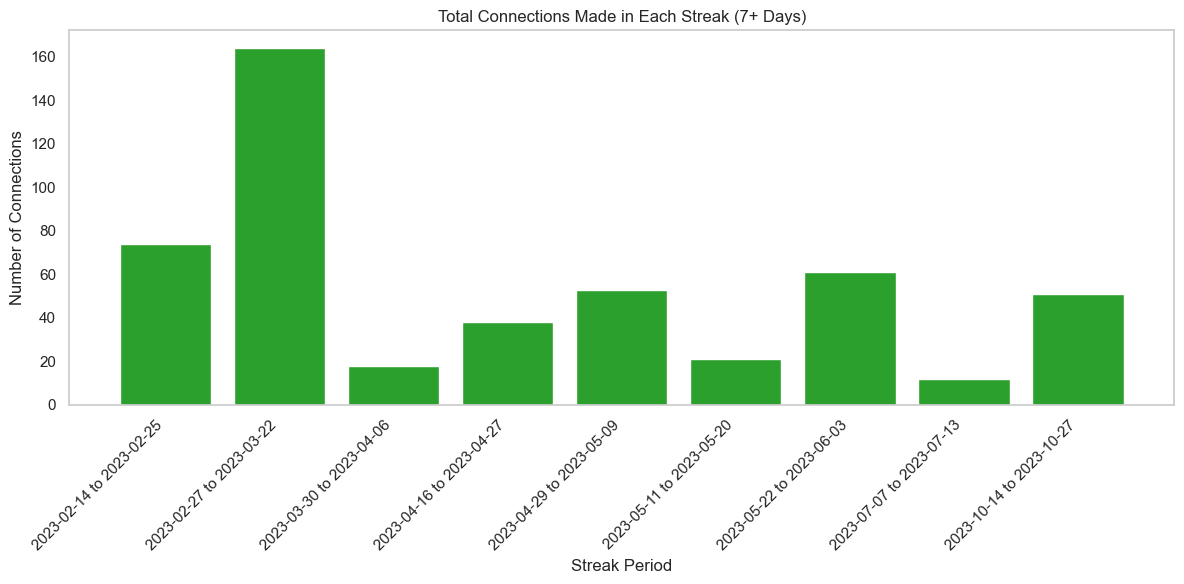

In [19]:
# Sort data by 'Connected On' in ascending order
data = data.sort_values(by='Connected On')

# Drop duplicate dates and make a copy to avoid warnings
data_unique_dates = data.drop_duplicates(subset='Connected On').copy()

# Create a new column to track the difference in days between consecutive dates
data_unique_dates.loc[:, 'Day Difference'] = data_unique_dates['Connected On'].diff().dt.days

# Identify the start of a new streak (if the difference is more than 1 day)
data_unique_dates.loc[:, 'Streak Start'] = data_unique_dates['Day Difference'] > 1

# Create a 'Streak ID' column to group the streaks together
data_unique_dates.loc[:, 'Streak ID'] = data_unique_dates['Streak Start'].cumsum()

# Count the length of each streak
streak_lengths = data_unique_dates.groupby('Streak ID').size()

# Filter for streaks that are 7 days or more
long_streaks = streak_lengths[streak_lengths >= 7]

# Get start and end dates of each long streak
streak_ranges = data_unique_dates.groupby('Streak ID')['Connected On'].agg(['min', 'max'])
streak_ranges = streak_ranges.loc[long_streaks.index]
streak_labels = streak_ranges.apply(lambda row: f"{row['min'].date()} to {row['max'].date()}", axis=1)

# --- NEW CODE FOR TOTAL CONNECTIONS ---
# Merge Streak IDs back to original data
date_streak_mapping = data_unique_dates[['Connected On', 'Streak ID']]
data_with_streak = data.merge(date_streak_mapping, on='Connected On', how='left')

# Calculate total connections per streak
total_connections_per_streak = data_with_streak.groupby('Streak ID').size()

# Filter for long streaks
total_connections_long_streaks = total_connections_per_streak.loc[long_streaks.index]

# Plot total connections per streak
plt.figure(figsize=(12, 6))
plt.bar(streak_labels, total_connections_long_streaks.values, color='#2ca02c')
plt.title('Total Connections Made in Each Streak (7+ Days)')
plt.xlabel('Streak Period')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/total_connections_per_streak.png", dpi=300, bbox_inches="tight")
plt.show()

## Most connected month/year

In [20]:
# Extract Year-Month from 'Connected On'
data['Year-Month'] = data['Connected On'].dt.to_period('M')

# Count the number of connections per month/year
connections_by_month_year = data.groupby('Year-Month').size()

# Find the most connected month/year
most_connected_month_year = connections_by_month_year.idxmax()
most_connected_connections = connections_by_month_year.max()

# Print the result
print(f"Most connected month/year: {most_connected_month_year}")
print(f"Number of connections: {most_connected_connections}")

Most connected month/year: 2023-03
Number of connections: 170


## Cohort analysis

Cohort Month
2021-07      3
2021-08     16
2021-09     18
2021-10     19
2021-12     20
2022-01     22
2022-02     24
2022-03     27
2022-04     30
2022-05     31
2022-06     32
2022-08     36
2022-09     38
2022-10     40
2022-11     43
2022-12     47
2023-01     89
2023-02    194
2023-03    364
2023-04    438
2023-05    559
2023-06    615
2023-07    631
2023-08    642
2023-09    684
2023-10    757
2023-11    772
2023-12    784
2024-01    793
2024-02    800
2024-03    805
2024-04    808
2024-05    811
2024-09    812
2024-10    820
2024-11    822
2024-12    823
2025-01    825
2025-02    826
2025-03    831
2025-04    834
Freq: M, dtype: int64


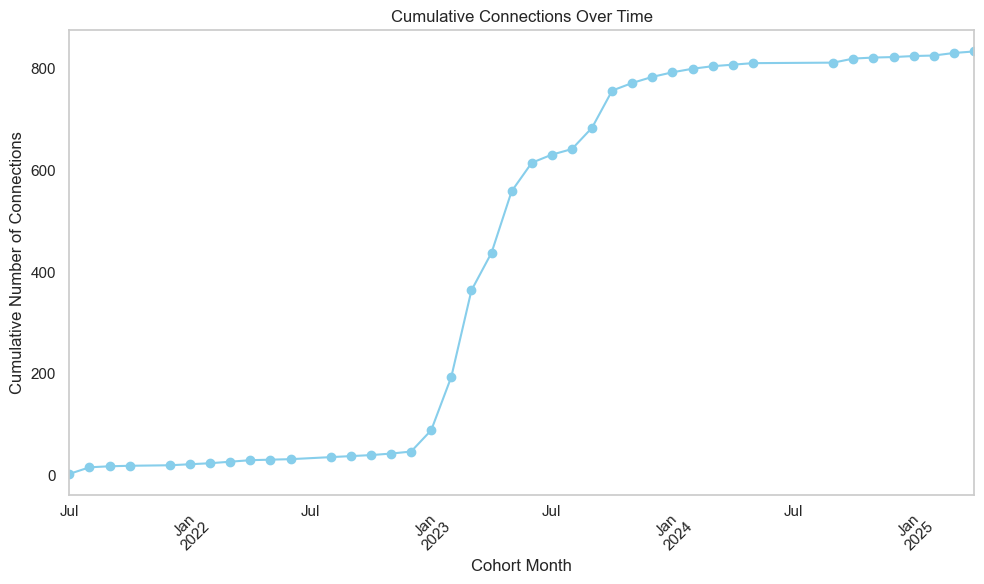

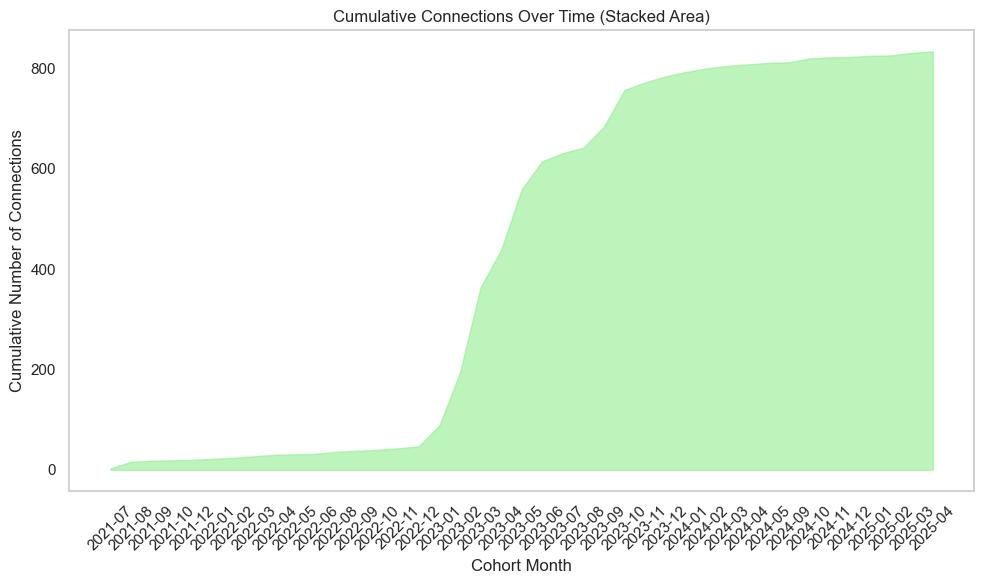

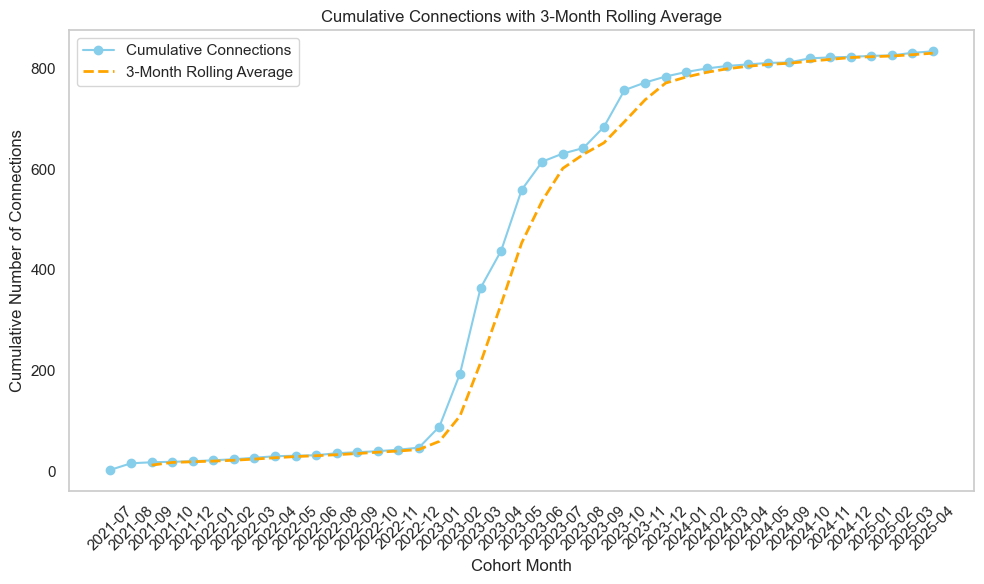

In [21]:
# Extract Year-Month from 'Connected On' to define cohorts
data['Cohort Month'] = data['Connected On'].dt.to_period('M')

# Group the data by Cohort Month and calculate the number of connections for each cohort
cohort_counts = data.groupby('Cohort Month').size()

# Calculate the cumulative sum of connections per cohort month
cumulative_cohort_counts = cohort_counts.cumsum()

# Compute the 3-month rolling average of the cumulative connections
rolling_avg = cumulative_cohort_counts.rolling(window=3).mean()

# Print the cumulative cohort counts
print(cumulative_cohort_counts)

# Plot cumulative cohort counts over time
plt.figure(figsize=(10, 6))
cumulative_cohort_counts.plot(kind='line', color='skyblue', marker='o')
plt.title('Cumulative Connections Over Time')
plt.xlabel('Cohort Month')
plt.ylabel('Cumulative Number of Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/cummulative_connections_line.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot cumulative cohort counts as a stacked area chart
plt.figure(figsize=(10, 6))
plt.fill_between(cumulative_cohort_counts.index.astype(str), cumulative_cohort_counts, color='lightgreen', alpha=0.6)
plt.title('Cumulative Connections Over Time (Stacked Area)')
plt.xlabel('Cohort Month')
plt.ylabel('Cumulative Number of Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/cummulative_connections_stacked.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert the Period index to a string format for plotting
cumulative_cohort_counts.index = cumulative_cohort_counts.index.astype(str)
rolling_avg.index = rolling_avg.index.astype(str)

# Plot cumulative connections with rolling average
plt.figure(figsize=(10, 6))
plt.plot(cumulative_cohort_counts, label='Cumulative Connections', color='skyblue', marker='o')
plt.plot(rolling_avg, label='3-Month Rolling Average', color='orange', linestyle='--', linewidth=2)
plt.title('Cumulative Connections with 3-Month Rolling Average')
plt.xlabel('Cohort Month')
plt.ylabel('Cumulative Number of Connections')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.savefig("../../plots/cummulative_connections_rolling.png", dpi=300, bbox_inches="tight")
plt.show()

## Seniority Demographics

In [22]:
# Show all unique Position rows sorted alphabetically, without truncation
with pd.option_context('display.max_rows', None, 'display.max_colwidth', None):
    unique_positions = pd.Series(data['Position'].dropna().unique()).sort_values().reset_index(drop=True)
    print(unique_positions)

0                                                               Associate Product Engineer III - Backend
1                                                                       .NET/Python/Azure Technical Lead
2                                                         AI & LLM-Powered Applications Research Scholar
3                                                                                            AI Engineer
4                                                                      AI/AR Product Development Advisor
5                                                                                               AOS Note
6                                                                                       AU-ICT Webmaster
7                                                                                                    AVP
8                                                                                        Abia State Rep.
9                                                      

              Count  Percentage (%)
Intermediate    487           58.39
Managerial      153           18.35
Executive       121           14.51
Entry-Level      42            5.04
Unknown          31            3.72


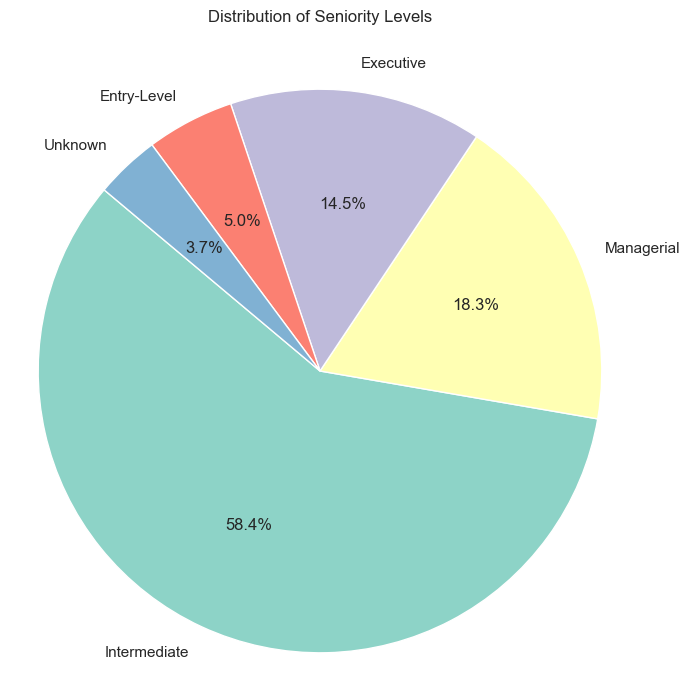


=== Executive Positions ===
- Account Executive
- Adjunct Professor
- Advisory Board - Developer Advocate 
- Advisory Board Member
- Ambassador
- Arquitecto de soluciones
- AVP
- Business Development Executive
- CEO and Executive Director
- Chairman of the Board
- Chief Errand Girl
- Chief Executive Officer
- Chief Risk Officer (CRO)
- Chief Technology Officer
- Chief Technology Officer of ALX
- Co-Chief Executive Officer
- Co-Founder
- Co-founder
- Co-Founder & CEO
- Co-founder & CEO
- Co-Founder & Chief Servant
- Co-Founder and CTO
- Co-Founder 💙 All things Talent Attraction
- Co-Founder, Product Lead
- CTO
- Customer Support Executive
- Deputy Director Population Health and Inequality
- Director - Graduate Recruitment
- Director of Recruiting / Sr. Technical Recruiter
- Director of Talent Acquisition - Technical Recruitment and Sourcing Operations
- Division Chief
- Enterprise Agile Coach
- Executive Director
- Executive Virtual Assistant and Project Manager
- Forbes Council Member

In [23]:
seniority_dict = {
    'Executive': [
        'CEO', 'CFO', 'CTO', 'Founder', 'President', 'Vice President', 'Executive', 
        'Chief', 'Board', 'Principal', 'CRO', 'Co-Founder', 'Partner', 'Advisory',
        'AVP', 'VP', 'Adjunct Professor', 'Ambassador', 'Self Employed', 'Enterprise Agile Coach',
        'Council Member', 'Forbes'  # Explicitly add "Council Member" and "Forbes"
    ],
    'Managerial': [
        'Manager', 'Director', 'Head', 'Supervisor', 'Lead', 'Officer', 'Administrator', 
        'Coordinator', 'Strategist', 'Chairman', 'Mentor', 'Controller', 'Branch Controller', 
        'Recruitment', 'Sourcer', 'Practitioner', 'Rep.', 'Business Development', 'Marketer',
        'Professor'  # Map "Assistant Professor" to Managerial via "Professor"
    ],
    'Intermediate': [
        'Engineer', 'Analyst', 'Specialist', 'Consultant', 'Developer', 'Scientist', 
        'Researcher', 'Recruiter', 'Writer', 'Designer', 'Architect', 'Technician', 
        'Advisor', 'Auditor', 'Representative', 'Accountant', 'Programmer', 'Content Creator',
        'Therapist', 'Trader', 'Teacher', 'Animator', 'Webmaster', 'Spokesperson', 'Scholar',
        'Editor', 'Coach', 'Data', 'MLOps', 'SDE', 'Annotator', 'Lecturer', 'Toxicologist',
        'Fitter', 'Realtor', 'Craftsman', 'Agile', 'Safety', 'Testing', 'Product Design',
        'Staff', 'Associate', 'Ambassador', 'Alumnus', 'Voluntary', 'Public Speaking', 
        'Insurance Broker', 'Network', 'Cybersecurity', 'Content Editor', 'Visionary', 
        'Note', 'Tracking', 'Productivity', 'Solutions', 'Healthcare', 'Foreign Exchange',
        'Trainer', 'Fellow', 'Artist', 'Resident', 'Officer'
    ],
    'Entry-Level': [
        'Intern', 'Junior', 'Trainee', 'Graduate', 'Student', 
        'Entry-Level', 'Volunteer', 'Cashier', 'Attachee', 'Freelance', 'No job',
        'Baker', 'Cake Decorator', 'Mechanical', 'Service', 'Adjunct', 
        'Bartender', 'Campus Ambassador', 'Assistant'  # Only standalone "Assistant"
    ]
}

# Function to categorize job titles
def assign_seniority(title):
    title_lower = title.lower()  # Normalize title to lowercase

    if  title_lower == 'Arquitecto de soluciones':
        return 'Unknown'

    if 'intern' in title_lower or title_lower == 'campus ambassador':
        return 'Entry-Level'

    if 'instructor' in title_lower or 'nstructor' in title_lower:
        return 'Intermediate'

    for seniority, keywords in seniority_dict.items():
        for word in keywords:
            if word.lower() in title_lower:
                return seniority

    return 'Unknown'

# Apply the function and handle NaN values
data['Position'] = data['Position'].fillna('')  # Replace NaN with empty string
data['Seniority'] = data['Position'].apply(assign_seniority)

# Count the number of positions in each seniority category
seniority_counts = data['Seniority'].value_counts()
seniority_percent = data['Seniority'].value_counts(normalize=True) * 100

# Combine counts and percentages
seniority_summary = pd.DataFrame({
    'Count': seniority_counts,
    'Percentage (%)': seniority_percent.round(2)
})

# Print the results
print(seniority_summary)

# Plot pie chart
plt.figure(figsize=(8, 8))
colors = plt.get_cmap('Set3').colors
plt.pie(seniority_summary['Count'], labels=seniority_summary.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Seniority Levels', pad=30)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save figure
plt.savefig('../../plots/seniority_distribution_piechart.png', bbox_inches='tight', dpi=300)

plt.show()
# Group the data by 'Seniority' and collect unique positions for each level
seniority_groups = data.groupby('Seniority')['Position'].agg(lambda x: list(x.unique())).to_dict()

# Define the order of seniority levels for organized printing
seniority_order = ['Executive', 'Managerial', 'Intermediate', 'Entry-Level']

# Print positions for each seniority level
for level in seniority_order:
    if level in seniority_groups:
        print(f"\n=== {level} Positions ===")
        positions = seniority_groups[level]
        # Handle empty strings (e.g., titles like '') by replacing with 'N/A'
        cleaned_positions = ['N/A' if isinstance(pos, str) and len(pos.strip()) == 0 else pos for pos in positions]
        # Sort alphabetically and print
        for pos in sorted(cleaned_positions, key=lambda x: str(x).lower()):
            print(f"- {pos}")
    else:
        print(f"\n=== {level} Positions ===")
        print("No positions found in this category.")

# Print positions not categorized (if any)
unknown_positions = data[data['Seniority'] == 'Unknown']['Position'].unique()
if len(unknown_positions) > 0:
    print("\n=== Uncategorized Positions (Unknown) ===")
    for pos in sorted(unknown_positions, key=lambda x: str(x).lower()):
        print(f"- {pos}")

## Connections in the AI and Data Field

In [24]:
roles = [
    "AI & LLM-Powered Applications Research Scholar",
    "AI Engineer",
    "AI/AR Product Development Advisor",
    "Applied Machine Learning Engineering Intern",
    "Artificial Intelligence Intern",
    "Assistant Business Analyst",
    "Associate Business Analyst",
    "Azure Cloud Infrastructure & Data Platform Engineer",
    "Business Intelligence Analyst",
    "Conversational AI Developer",
    "Data Analyst",
    "Data Anotator",
    "Data Engineering Intern",
    "Data Manager",
    "Data Mining Specialist, computer programming",
    "Data Science Manager",
    "Data Scientist",
    "Data Specialist - Analytics Engineer",
    "Global Head of Data Science",
    "MLOps",
    "Project Coordinator / Business Analyst",
    "Researcher - Data Analysis - Hull Engineering",
    "SAP Business Analyst",
    "Senior Analyst",
    "Senior Python and AI Developer",
    "Senior Research Engineer (Machine Learning)",
]

# Clean role names in your dataset to match formatting
data['Position'] = data['Position'].fillna('').str.strip()

# Only include entries that match the provided list
matched_roles_df = data[data['Position'].isin(roles)]

# 1. Count of people under each role
role_counts = matched_roles_df['Position'].value_counts()

print("1. Count of people under each role:\n")
print(role_counts)

# 2. Subset and total sizes
subset_total = len(matched_roles_df)
total_connections = len(data)
percentage = (subset_total / total_connections) * 100

print(f"\n2. Estimated population in subset: {subset_total}")
print(f"   Total connections: {total_connections}")
print(f"   Subset as percentage of total: {percentage:.2f}%")

# 3. Print each person under each matched role
print("\n3. People under each role:\n")

for role in role_counts.index:
    print(f"\n📌 {role} ({role_counts[role]}):")
    people = matched_roles_df[matched_roles_df['Position'] == role]
    for _, row in people.iterrows():
        full_name = f"{row['First Name']} {row['Last Name']}".strip()
        print(f" - {full_name}")

1. Count of people under each role:

AI Engineer                                            3
Data Scientist                                         2
Data Analyst                                           2
Associate Business Analyst                             1
Azure Cloud Infrastructure & Data Platform Engineer    1
Senior Python and AI Developer                         1
Global Head of Data Science                            1
Data Specialist - Analytics Engineer                   1
Data Engineering Intern                                1
Senior Research Engineer (Machine Learning)            1
SAP Business Analyst                                   1
Applied Machine Learning Engineering Intern            1
AI/AR Product Development Advisor                      1
AI & LLM-Powered Applications Research Scholar         1
Senior Analyst                                         1
Project Coordinator / Business Analyst                 1
Data Manager                                       

## Project Takeaways

- Peak Networking Period Identified: The most active connection period was from late 2022 to mid-2023, with a sharp peak in March 2023, during which I made 170 connections. This concentrated burst of activity significantly impacted my overall network size.

- Strong Presence in Mid-Level Roles: Over 58% of my connections hold intermediate positions, indicating that my network is rich in mid-career professionals, with a healthy mix of managerial and executive contacts as well.

- Company Concentration Noted: The most common company listed by my connections is Microsoft, followed by other major organizations such as Amazon, MTN Nigeria, CDI, CDW, and Infosys. 

- Connection Streaks Observed: Connections occurred on only 298 distinct days, but notable streaks included one lasting 24 consecutive days, during which I made over 160 connections, showing bursts of focused outreach.

- Dominance of Technical Roles: The most common job title in my network is Software Engineer, with 66 connections, followed by Senior Software Engineer at 24 connections - reflecting a tech-heavy professional circle.